# Wrangle 
Data Acquisition + Preparation

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Acquisition
> Read in the data to work with

#### Read data: CSV --> Pandas DataFrame

In [61]:
df = pd.read_csv('fitbit/fitbit_time_series.csv')
df.head(3)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,"2,635","2,931",1.38,2.0,"1,347",93.0,0.0,0.0,566
1,2018-04-27,"3,649","9,971",4.70,19.0,"1,158",219.0,46.0,17.0,"1,752"
2,2018-04-28,"3,379","3,521",1.66,2.0,702,155.0,22.0,11.0,"1,124"


#### Initial Data Summary

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    247 non-null    object 
 1   Calories Burned         225 non-null    object 
 2   Steps                   225 non-null    object 
 3   Distance                225 non-null    float64
 4   Floors                  225 non-null    float64
 5   Minutes Sedentary       225 non-null    object 
 6   Minutes Lightly Active  225 non-null    float64
 7   Minutes Fairly Active   225 non-null    float64
 8   Minutes Very Active     225 non-null    float64
 9   Activity Calories       225 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.4+ KB


### Acquisition Takeaways
- Date needs to be converted to datetime type
- Missing values need to be dropped. These are the last two weeks that need to be predicted by a model.
- Columns/Features need to be lowercases and spaces replaces by underscore for best practice and easy reading/writing.
- Data types need to be corrected since all variables seem to be numberical so integer or float types.

---
# Preparation
> Clean and preprocess the data to explore + model

#### Data Cleaning

In [63]:
# drop last 22 days since we will be predicting them
df = df[:-22]

In [64]:
# lowercase the features, use a '_' to replace whitespace
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [65]:
# change 'date' --> datetime type
df.date = pd.to_datetime(df.date)

In [66]:
# change the index --> date, sort by date
df.set_index(df.date, inplace=True)
df = df.sort_index()

In [67]:
# change the commas in 'calories_burned, steps, 
# minutes_sedentary, activity_calories' --> '_'
# change columns to int type
df['calories_burned'] = df['calories_burned'].str.replace(',', '_').astype('int')
df['steps'] = df['steps'].str.replace(',', '_').astype('int')
df['minutes_sedentary'] = df['minutes_sedentary'].str.replace(',', '_').astype('int')
df['activity_calories'] = df['activity_calories'].str.replace(',', '_').astype('int')

#### Data Preprocessing

In [68]:
# creates a month column in integer form
df['month'] = df.date.dt.month
# creates a day of the week column in string form
df['weekday'] = df.date.dt.day_name()

In [69]:
# drop remaining date column
df.drop(columns='date', inplace=True)

#### Prepared Data Summary

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories_burned         225 non-null    int64  
 1   steps                   225 non-null    int64  
 2   distance                225 non-null    float64
 3   floors                  225 non-null    float64
 4   minutes_sedentary       225 non-null    int64  
 5   minutes_lightly_active  225 non-null    float64
 6   minutes_fairly_active   225 non-null    float64
 7   minutes_very_active     225 non-null    float64
 8   activity_calories       225 non-null    int64  
 9   month                   225 non-null    int64  
 10  weekday                 225 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 21.1+ KB


#### Prepared Data peek

In [71]:
df.head(3)

,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,month,weekday
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2.0,1347,93.0,0.0,0.0,566,4,Thursday
2018-04-27,3649,9971,4.70,19.0,1158,219.0,46.0,17.0,1752,4,Friday
2018-04-28,3379,3521,1.66,2.0,702,155.0,22.0,11.0,1124,4,Saturday


#### Split the data for Exploration

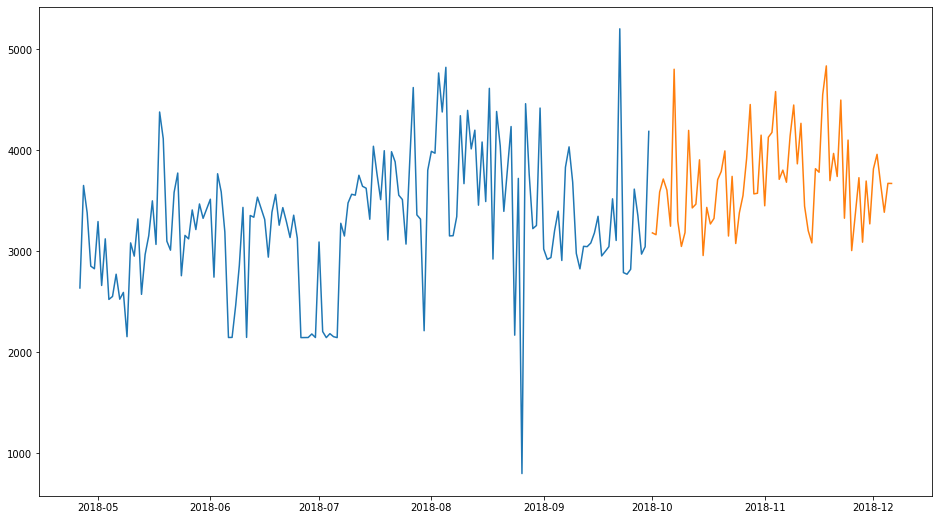

In [79]:
# 70% of the data will be train
train_size = .70
# n is set to the number of rows in the data (225)
n = df.shape[0]
# number of rows used to index for train data set
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

# visulaize the split using calories burned as the y variable
plt.plot(train.index, train.calories_burned)
plt.plot(test.index, test.calories_burned)

### Preparation Takeaways
- All variables are continous
- We have 9 variables total
- There are 225 observations
- Each observation contain the metrics for one day

### Preprocessing Takeaways
- Created `month` and `weekday` features
- Split the data into train, validate and test
- Visualized the split

---
# Exploration
>Find trends, seasonality, and seasonal decomposition

#### Distribution of each Variable

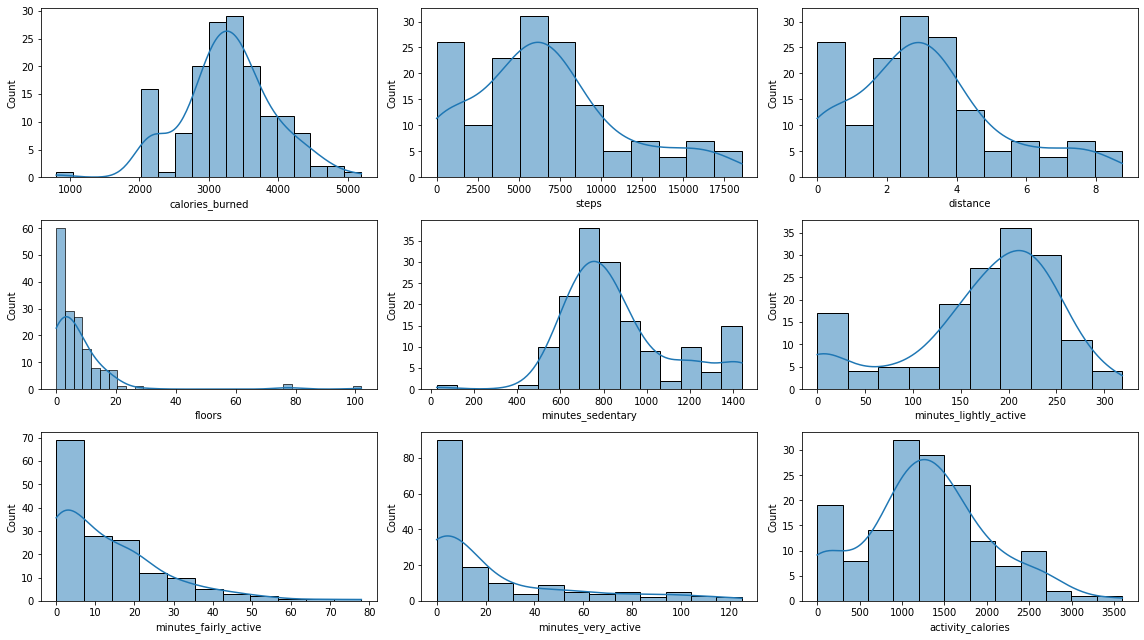

In [85]:
count=0
for i in train.drop(columns=['weekday','month']):
    plt.rc('figure', figsize=(16,9))
    count+=1
    plt.subplot(3, 3, count)
    sns.histplot(data=train.drop(columns=['weekday','month']), x=i, kde=True)
plt.tight_layout()

Feature Distributions
- Nearly Normal: 
    - `calories_burned` 
    - `minutes_sedentary`
    - `minutes_lightly_active`
    - `activity_calories`
- Skewed Right:
    - `steps`
    - `distance`
    - `floors`
    - `minutes_fairly_active`
    - `minutes_very_active`
- `day` and `month` are omitted since they are not target variables to be predicted

#### Visualize Average for Targets by Month

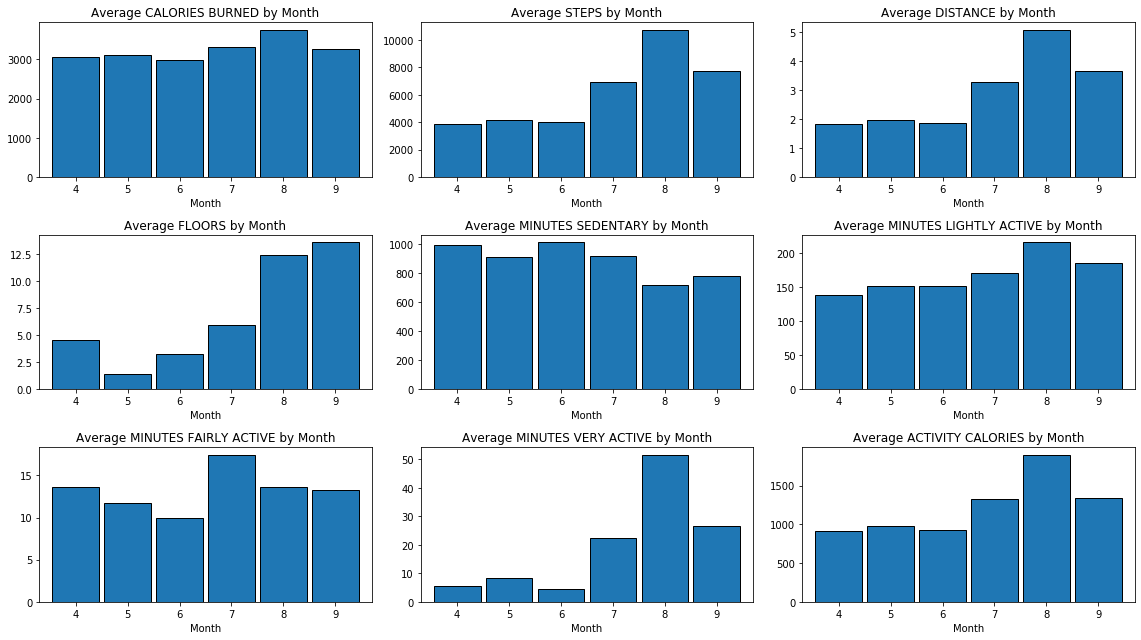

In [99]:
count=0
for i in train.drop(columns=['weekday','month']):
    plt.rc('figure', figsize=(16,9))
    count+=1
    plt.subplot(3, 3, count)
    I = i.upper().replace('_', ' ')
    ax = train[i].groupby(train.index.month).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=0)
    ax.set(title=f'Average {I} by Month', xlabel='Month')
plt.tight_layout()

#### Visualize Average for Targets by Weekday

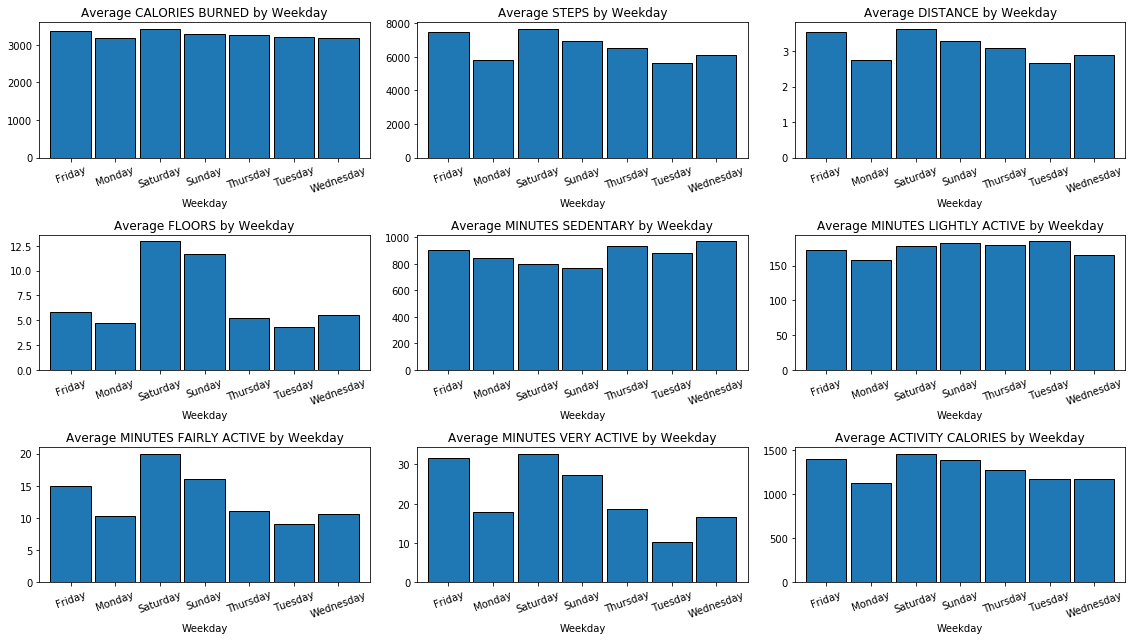

In [103]:
count=0
for i in train.drop(columns=['weekday','month']):
    plt.rc('figure', figsize=(16,9))
    count+=1
    plt.subplot(3, 3, count)
    I = i.upper().replace('_', ' ')
    ax = train[i].groupby(train.index.day_name()).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=20)
    ax.set(title=f'Average {I} by Weekday', xlabel='Weekday')
plt.tight_layout()

#### Boxplot for Targets by Weekday

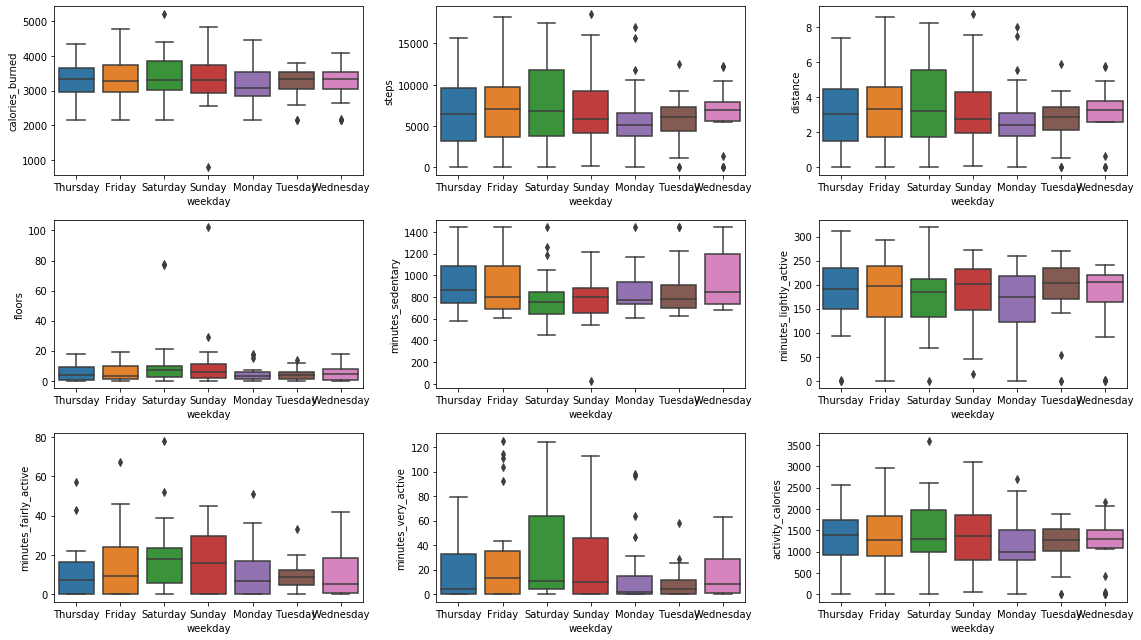

In [120]:
count=0
for i in train.drop(columns=['weekday','month']):
    plt.rc('figure', figsize=(16,9))
    count+=1
    plt.subplot(3, 3, count)
    I = i.upper().replace('_', ' ')
    train[i].reset_index()\
    .assign(weekday=lambda train: train.date.dt.day_name())\
    .pipe((sns.boxplot, 'data'), y=i, x='weekday')
plt.tight_layout()

### Categorical Variable Takeaways
1. Month
    - `steps`, `distance`, and `activity_calories` have a very similar distribution.
    - `calories_burned` is greatest in August, lowest in June
    - `floors` are highest in September, lowest in May
    - All 'active' features are highest in July/August.

2. Weekday
    - Most calories are burned on Saturday then Friday, but pretty consistent throughout the week. The same can be said for `distance`, `steps` and `activity_calories`.
    - The distribution is very similar among `floors` and `minutes fairly active`. These are prominent on the weekends (Friday-Sunday) with peaks on Saturday.
    - `minutes_sedentary` is highest mid-week
    - Not very active monday-thursday.